
## Project Title: Gender Prediction Using Favorite Preferences

### Project Summary:
This project aims to develop a machine learning (ML) model that predicts gender based on an individual's preferences for specific independent variables, including:

- Favorite Color
- Favorite Music Genre
- Favorite Beverage
- Favorite Soft Drink

The project involves building a classification model using supervised learning techniques. Various algorithms will be evaluated and optimized to achieve the best performance. The algorithms to be implemented include:

- Support Vector Classifier (SVC)
- k-Nearest Neighbors (KNN)
- Logistic Regression
- Random Forest Regression
- Decision Tree Regression
- XGB Classifier
Key methodological steps include:

- Data Preprocessing: Transforming categorical variables into numerical representations and handling missing or inconsistent data.
- Cross-Validation: Ensuring robust evaluation of model performance by splitting the data into training and validation sets.
- Hyperparameter Tuning: Optimizing model parameters using techniques such as grid search or random search to improve prediction accuracy.
### Evaluation Metrics:

- Confusion Matrix: To analyze performance through metrics such as accuracy, precision, recall, and F1-score.
The analysis will compare the performance of different algorithms and identify the best-suited model for predicting gender based on the given variables. Insights derived from the confusion matrix will guide the selection of the final model and its application.

In [1]:
## Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
## Loading dataset
df1 = pd.read_csv(r"C:\Users\Pearl\Downloads\Transformed Data Set - Sheet1.csv")

In [3]:
## Loading 2nd dataset
df2 = pd.read_csv(r"C:\Users\Pearl\OneDrive\Documents\GOMYCODE TRAINING\Machine_learning\Machine_Learning_Projects\GENDER_DATA2.csv")

In [4]:
df1.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
df2.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Warm,Rock,Vodka,7UP/Sprite,F
1,Warm,Pop,Doesn't drink,Coca Cola/Pepsi,F
2,Warm,Rock,Doesn't drink,7UP/Sprite,F
3,Warm,Rock,Beer,Coca Cola/Pepsi,M
4,Warm,Pop,Beer,Fanta,F


In [6]:
df = pd.concat([df1,df2], ignore_index = True, axis = 0)

In [130]:
df[285:290]

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
285,2,1,0,1,1
286,2,4,3,1,0
287,2,1,0,1,1
288,2,6,1,1,0
289,2,1,1,1,1


In [8]:
df.isnull().any()

Favorite Color          False
Favorite Music Genre    False
Favorite Beverage       False
Favorite Soft Drink     False
Gender                  False
dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10066 entries, 0 to 10065
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        10066 non-null  object
 1   Favorite Music Genre  10066 non-null  object
 2   Favorite Beverage     10066 non-null  object
 3   Favorite Soft Drink   10066 non-null  object
 4   Gender                10066 non-null  object
dtypes: object(5)
memory usage: 393.3+ KB


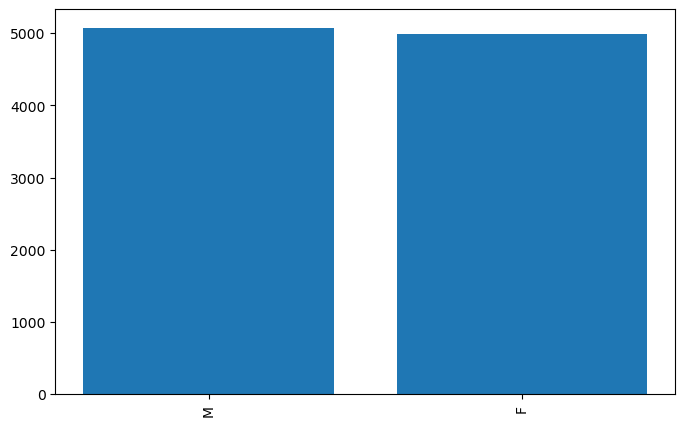

In [10]:
## Visualizing dataset
plt.rc("figure", figsize=(8, 5))
plt.bar(df["Gender"].value_counts().index, df["Gender"].value_counts())
plt.xticks(rotation=90);

In [11]:
encode = LabelEncoder()

In [12]:
def encoder(column):
    """This is a function to convert the categorical columns into numeric ones"""
    for col in column:
        df[col] = encode.fit_transform(df[col])
        print(encode.classes_)
    return column


In [13]:
encoder(["Favorite Color","Favorite Music Genre","Favorite Beverage","Favorite Soft Drink","Gender"])

['Cool' 'Neutral' 'Warm']
['Electronic' 'Folk/Traditional' 'Hip hop' 'Jazz/Blues' 'Pop'
 'R&B and soul' 'Rock']
['Beer' "Doesn't drink" 'Other' 'Vodka' 'Whiskey' 'Wine']
['7UP/Sprite' 'Coca Cola/Pepsi' 'Fanta' 'Other']
['F' 'M']


['Favorite Color',
 'Favorite Music Genre',
 'Favorite Beverage',
 'Favorite Soft Drink',
 'Gender']

In [14]:
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


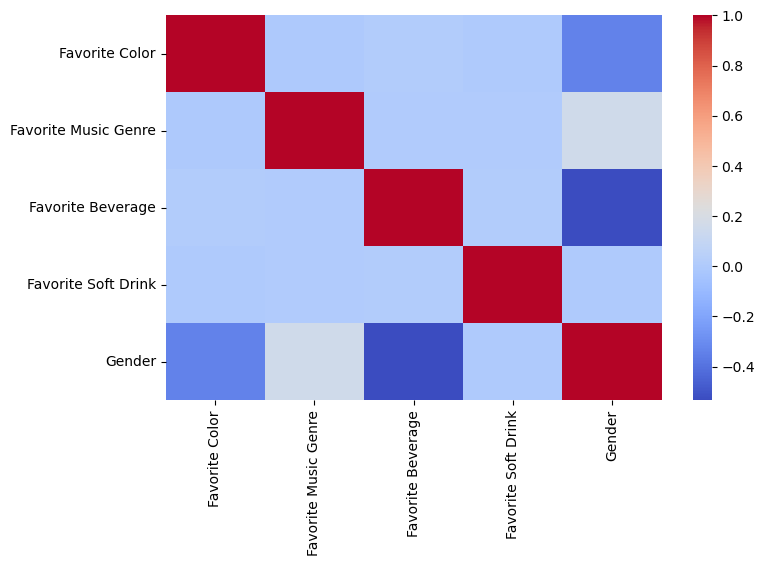

In [15]:
sns.heatmap(df.corr(), cmap="coolwarm");

In [16]:
df.corr()["Gender"]

Favorite Color         -0.338661
Favorite Music Genre    0.155150
Favorite Beverage      -0.534786
Favorite Soft Drink     0.002705
Gender                  1.000000
Name: Gender, dtype: float64

In [17]:
## Defining our independent and dependent variables
X = df.drop(["Gender"], axis = 1).values

In [122]:
y = df.Gender

In [129]:
y_test

7612    0
285     1
9605    1
3914    0
9073    0
       ..
5693    1
9364    0
5261    0
1437    1
3412    0
Name: Gender, Length: 1510, dtype: int32

In [125]:
## splitting our dataset (training and testing)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15, random_state=10)

In [126]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8556, 4) (1510, 4) (8556,) (1510,)


In [35]:
models = {
    "logistic_regression": LogisticRegression(),
    "XGBClassifier":XGBClassifier(),
    "DecisionTree":DecisionTreeClassifier(),
    "KNN":KNeighborsClassifier(n_neighbors = 5),
    "SVC":SVC(),
    "RandomForestClassifier":RandomForestClassifier(max_depth=5, random_state=1)
    
}

In [36]:
for name, model in models.items():
    print(model.fit(X_train, y_train))
    print(model.score(X_train, y_train))
    print(model.score(X_test,y_test))

LogisticRegression()
0.7254558204768583
0.7158940397350994
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
0.8950444132772324
0.8814569536423841
DecisionTreeClassifier()
0.8957456755493222
0.8821192052980132
KNeighborsClassifier()
0.8882655446470313
0.8887417218543047
SVC()
0.8883824216923

In [37]:
## Cross Validation with Sckit-learn
avg_scores = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X,y,cv=5)
    avg_scores= np.average(cv_scores)
    print(f"{avg_scores}:{name}")

0.7311755121008381:logistic_regression
0.8841648450908222:XGBClassifier
0.8845622125499052:DecisionTree
0.8876420446837365:KNN
0.8824759717249989:SVC
0.8827738369910378:RandomForestClassifier


In [38]:
### Defining the parameter grid
model_params = {
    "svm":{
        "model":SVC(gamma = "scale"),
        "params": {"C":[1,10,20], "kernel":["rbf", "linear"]}
    },
    "random_forest": {
        "model": RandomForestClassifier(),
        "params":{"n_estimators": [1,5,10], "max_depth": [5,8,10]
                 }
    },
    "logisticclassif": {"model": LogisticRegression(solver = "liblinear", multi_class = "auto"),
                            "params": {"C" : [1,5,10], "max_iter": [10,50,150]
                                      }
                           },
    "XGBClassifier": {
        "model":XGBClassifier(),
        "params":{"n_estimators": [1,3,100,50], "max_depth": [5,10,15,20] 
                 }
}
}

In [39]:
### Hyper-parameters tuning
from sklearn.model_selection import RandomizedSearchCV
scores = []
for model_name, mp in model_params.items():
    clf = RandomizedSearchCV(mp["model"], mp["params"], cv = 5, return_train_score = False, n_iter = 2)
    clf.fit(X_train,y_train)
    scores.append({
    "model": model_name,
    "best_score": clf.best_score_,
    "best_params":clf.best_params_
    })
print(scores)

[{'model': 'svm', 'best_score': 0.8866285770468163, 'best_params': {'kernel': 'rbf', 'C': 20}}, {'model': 'random_forest', 'best_score': 0.8874462657788799, 'best_params': {'n_estimators': 10, 'max_depth': 10}}, {'model': 'logisticclassif', 'best_score': 0.7254566384635973, 'best_params': {'max_iter': 50, 'C': 1}}, {'model': 'XGBClassifier', 'best_score': 0.8890828039568051, 'best_params': {'n_estimators': 1, 'max_depth': 10}}]


In [26]:
from sklearn.ensemble import StackingClassifier

In [27]:

stacked_model = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(n_estimators=10)),
        ('knn', KNeighborsClassifier()),
        ('lr', LogisticRegression()),
        ('svc', SVC())
    ], cv =5 
)
stacked_model.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(n_estimators=10)),
                               ('knn', KNeighborsClassifier()),
                               ('lr', LogisticRegression()), ('svc', SVC())])

In [28]:
stacked_model.score(X_test,y_test)

0.8880794701986755

In [40]:
y_pred = stacked_model.predict(X_test)

In [41]:
y_pred[:10]

array([0, 1, 1, 0, 0, 1, 0, 1, 0, 0])

In [42]:
y_test[:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0])

### Model Evaluation

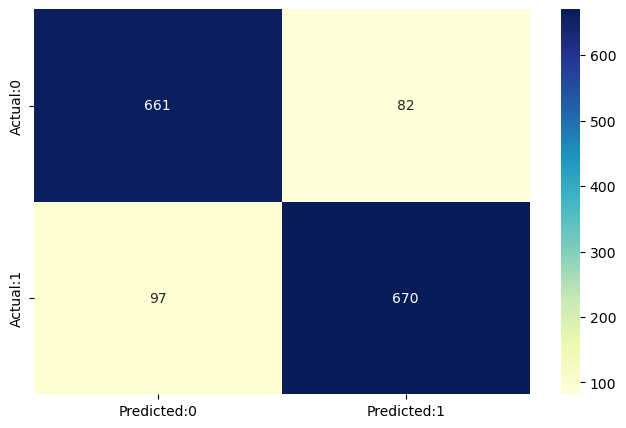

In [46]:
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns = ["Predicted:0", "Predicted:1"], index = ["Actual:0", "Actual:1"])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu");

In [47]:
TN=cm[0,0]
TP=cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity=TP/float(TP+FN)
specificity = TP/float(TP+FP)
precision = TP/TP+FP
recall = TP/TP+FN

print(precision, ":", recall)
print(sensitivity, ":", specificity)

83.0 : 98.0
0.8735332464146024 : 0.8909574468085106


In [48]:
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) = '
      ,(TP+TN)/float(TP+TN+FP+FN),'\n',

'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',

'Sensitivity or True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',

'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',

'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',

'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',

'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',

'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.8814569536423841 
 The Missclassification = 1-Accuracy =  0.11854304635761592 
 Sensitivity or True Positive Rate = TP/(TP+FN) =  0.8735332464146024 
 Specificity or True Negative Rate = TN/(TN+FP) =  0.8896366083445492 
 Positive Predictive value = TP/(TP+FP) =  0.8909574468085106 
 Negative predictive Value = TN/(TN+FN) =  0.8720316622691293 
 Positive Likelihood Ratio = Sensitivity/(1-Specificity) =  8.010939040290012 
 Negative likelihood Ratio = (1-Sensitivity)/Specificity =  0.14194477417346119


In [139]:
def prediction(data):
    """making predictions based on ML model"""
    #imput_array = data.get('numbers')
    input_data_as_numpy_array = np.asarray(data)
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = stacked_model.predict(input_data_reshaped)
    if prediction[0] == 0:
        print("It's a female")
    else:
        print("It's a male")

In [65]:
categories = {
    "Favorite Colour" : {'Cool':0 ,'Neutral':1, 'Warm':2},
"Favorite Music Genre": {'Electronic':0, 'Folk/Traditional':1, 'Hip hop':2, 'Jazz/Blues':3, 'Pop':4,
 'R&B and soul':5, 'Rock':6},
"Favorite Beverage": {'Beer':0, "Doesn't drink":1, 'Other':2, 'Vodka':3, 'Whiskey':4, 'Wine':5},
"Favorite Soft drink": {'7UP/Sprite':0, 'Coca Cola/Pepsi':1, 'Fanta':2, 'Other':3}
}

In [164]:
prediction([2,2,4,0])

It's a female


In [165]:
prediction([2,2,1,0])

It's a male
